In [30]:
def splitDF(df, ai_name="ai_1"):
    ais = df["ai_name"].unique()
    ts = [df.loc[df["ai_name"] == ai, "datetime"].min() for ai in ais]
    ts.append(df["datetime"].max())
    ts.sort()
    df = df[df["ai_name"] == ai_name]
    return [df[(ta <= df["datetime"]) & (df["datetime"] <= tb)] for (ta, tb) in zip(ts[:-1], ts[1:])]

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
EXPID = "48hadoop" #"EXP-04-09-2020-10-00-32-AM-UTC" #"EXP-04-08-2020-07-42-36-AM-UTC"
# 21giraph, 22redis
# 38giraph
BASE_PATH = "../data/"
NODE = "baati"
DATA_PATH = f"{BASE_PATH}{EXPID}/VM_runtime_app_{EXPID}.csv"
RESOURCES_PATH = f"{BASE_PATH}{EXPID}/resources/metric_node_{NODE}_cpu.csv"
SKIPROWS=28

df = pd.read_csv(DATA_PATH, skiprows=SKIPROWS, parse_dates=True)
res = pd.read_csv(RESOURCES_PATH)
df["datetime"] = pd.to_datetime(df["time_h"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   time                 56 non-null     int64              
 1   time_h               56 non-null     object             
 2   time_cbtool          56 non-null     int64              
 3   time_cbtool_h        56 non-null     object             
 4   uuid                 56 non-null     object             
 5   name                 56 non-null     object             
 6   role                 56 non-null     object             
 7   ai_name              56 non-null     object             
 8   type                 56 non-null     object             
 9   host_name            56 non-null     object             
 10  aidrs_name           56 non-null     object             
 11  sla_provisioning     0 non-null      float64            
 12  app_load_id          56 

In [57]:
m = df.loc[df["ai_name"] == "ai_2", "datetime"].min()
df.loc[(df["ai_name"] == "ai_1") & (df["datetime"] >= m), "datetime"].count()
x = [3, 2]
x.sort()
x
df[df["ai_name"] == "ai_1"]

dfs = splitDF(df)

#[df2["datetime"].count() for df2 in dfs]
print([df2["app_latency"].mean() for df2 in dfs])
[df2["app_latency"].std() for df2 in dfs]
#df.plot(x="datetime", y="app_completion_time")
#res.plot(y="value")

[129643.4, 172821.33333333334, 165477.5, 204810.33333333334, 196822.33333333334, 300463.0]


[37361.771355223515,
 19279.261431220162,
 36081.37859062483,
 52417.50442679747,
 97551.91684602272,
 nan]

In [50]:
dfs[1]

,time,time_h,time_cbtool,time_cbtool_h,uuid,name,role,ai_name,type,host_name,...,app_throughput,app_latency,app_loss,app_jitter,app_bandwidth,app_errors,app_completion_time,app_sla_runtime,app_iterations,datetime
0,384,04/10/2020 10:54:08 AM UTC,384,04/10/2020 10:54:08 AM UTC,4DF9902E-3EB6-591A-898C-D59454FD7847,vm_1,hadoopmaster,ai_1,hadoop,baati.mimuw.edu.pl,...,25,131776.0,NaN,NaN,NaN,0,139,NaN,4,2020-04-10 10:54:08+00:00
1,506,04/10/2020 10:56:10 AM UTC,506,04/10/2020 10:56:10 AM UTC,4DF9902E-3EB6-591A-898C-D59454FD7847,vm_1,hadoopmaster,ai_1,hadoop,baati.mimuw.edu.pl,...,42,79887.0,NaN,NaN,NaN,0,87,NaN,2,2020-04-10 10:56:10+00:00
2,706,04/10/2020 10:59:30 AM UTC,706,04/10/2020 10:59:30 AM UTC,4DF9902E-3EB6-591A-898C-D59454FD7847,vm_1,hadoopmaster,ai_1,hadoop,baati.mimuw.edu.pl,...,21,159672.0,NaN,NaN,NaN,0,167,NaN,5,2020-04-10 10:59:30+00:00
3,855,04/10/2020 11:01:59 AM UTC,855,04/10/2020 11:01:59 AM UTC,4DF9902E-3EB6-591A-898C-D59454FD7847,vm_1,hadoopmaster,ai_1,hadoop,baati.mimuw.edu.pl,...,31,106450.0,NaN,NaN,NaN,0,113,NaN,3,2020-04-10 11:01:59+00:00
4,1072,04/10/2020 11:05:36 AM UTC,1072,04/10/2020 11:05:36 AM UTC,4DF9902E-3EB6-591A-898C-D59454FD7847,vm_1,hadoopmaster,ai_1,hadoop,baati.mimuw.edu.pl,...,19,170432.0,NaN,NaN,NaN,0,178,NaN,5,2020-04-10 11:05:36+00:00
6,1288,04/10/2020 11:09:12 AM UTC,1288,04/10/2020 11:09:12 AM UTC,4DF9902E-3EB6-591A-898C-D59454FD7847,vm_1,hadoopmaster,ai_1,hadoop,baati.mimuw.edu.pl,...,20,166732.0,NaN,NaN,NaN,0,178,NaN,5,2020-04-10 11:09:12+00:00
8,1488,04/10/2020 11:12:32 AM UTC,1488,04/10/2020 11:12:32 AM UTC,4DF9902E-3EB6-591A-898C-D59454FD7847,vm_1,hadoopmaster,ai_1,hadoop,baati.mimuw.edu.pl,...,21,157322.0,NaN,NaN,NaN,0,166,NaN,5,2020-04-10 11:12:32+00:00
10,1730,04/10/2020 11:16:34 AM UTC,1730,04/10/2020 11:16:34 AM UTC,4DF9902E-3EB6-591A-898C-D59454FD7847,vm_1,hadoopmaster,ai_1,hadoop,baati.mimuw.edu.pl,...,17,194410.0,NaN,NaN,NaN,0,203,NaN,5,2020-04-10 11:16:34+00:00
14,1904,04/10/2020 11:19:28 AM UTC,1904,04/10/2020 11:19:28 AM UTC,4DF9902E-3EB6-591A-898C-D59454FD7847,vm_1,hadoopmaster,ai_1,hadoop,baati.mimuw.edu.pl,...,27,123335.0,NaN,NaN,NaN,0,132,NaN,3,2020-04-10 11:19:28+00:00
17,2144,04/10/2020 11:23:28 AM UTC,2144,04/10/2020 11:23:28 AM UTC,4DF9902E-3EB6-591A-898C-D59454FD7847,vm_1,hadoopmaster,ai_1,hadoop,baati.mimuw.edu.pl,...,18,184677.0,NaN,NaN,NaN,0,195,NaN,5,2020-04-10 11:23:28+00:00


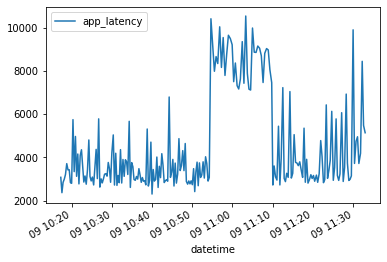

In [20]:
df2 = df.loc[df["ai_name"] == "ai_1", ["datetime", "app_completion_time", "app_latency"]]
df2.plot(x="datetime", y="app_latency")
#df2 = df.loc[df["ai_name"] == "ai_2", ["datetime", "app_completion_time", "app_latency"]]
#df2["datetime"]


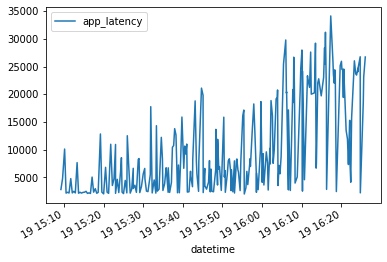

In [27]:
df.plot(x="datetime", y="app_latency")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ef35a2710>],
      dtype=object)

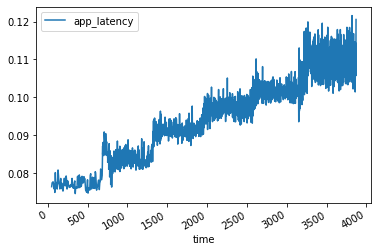

In [45]:
lat = df["app_latency"]
#lat.min()
#df.info()
df2 = df
for ai in df["ai_name"].unique():
    df2[f"latency_{ai}"] = df.loc[df["ai_name"] == ai, "app_latency"]
#df2.info()
df2.plot(x="time", y="app_latency", subplots=True)

In [46]:
cols = [f"latency_{ai}" for ai in df["ai_name"].unique()]
df3 = df2[["datetime"] + cols]

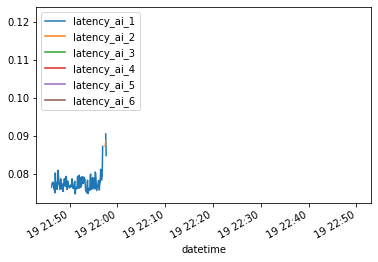

In [48]:
df3.plot(x="datetime")